# CKP8366 - TÓPICOS AVANÇADOS - APRENDIZAGEM DE MÁQUINA PROBABILÍSTICA

<img  src="https://img.shields.io/badge/UFC_CKP8366-VAUX GOMES-000000?style=for-the-badge&logo=" /> <img src="https://img.shields.io/badge/Jupyter-000000?style=for-the-badge&logo=jupyter&logoColor=white" /> <img src="https://img.shields.io/badge/Python-000000?style=for-the-badge&logo=python&logoColor=white" />


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Carregamento dos dados

In [67]:
df = pd.read_csv('./files/linear_regression_data.csv', header=None)
df.rename(columns={0: 'A', 1: 'B'}, inplace=True)

#
data = df.to_numpy()
X = data[:, :-1]
y = data[:, -1:]

#
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, train_size=0.66, random_state=42)

#
df.head(5)

,A,B
0,0.392938,0.086360
1,-0.427721,-0.643872
2,-0.546297,-0.674981
3,0.102630,-0.262892
4,0.438938,0.143177


In [70]:
X.max()

array([[ 0.39293837],
       [-0.42772133],
       [-0.54629709],
       [ 0.10262954],
       [ 0.43893794],
       [-0.15378708],
       [ 0.9615284 ],
       [ 0.36965948],
       [-0.0381362 ],
       [-0.21576496]])

[[0.45527012]]


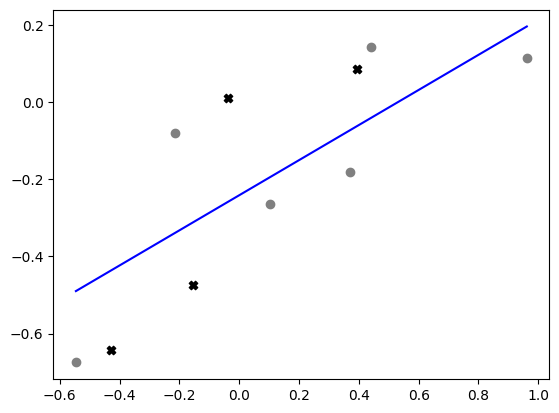

In [81]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

plt.scatter(X_train, y_train, color='gray')
plt.scatter(X_test, y_test, color='black', marker='X')

plt.plot(
    np.linspace(X.min(), X.max(), 100),
    regr.predict(
        np.linspace(X.min(), X.max(), 100).reshape(100, -1)), 
    color='blue')

print(regr.coef_)

### Questão 1

In [92]:
class BayesianLinearRegression:
    def __init__(self, mean=0, sigma=0.0001):
        self.mean = mean
        self.sigma = sigma

    def fit(self, X, y):
        # Prior w
        prior = multivariate_normal(
            mean=self.mean, cov=self.sigma*np.eye(X.shape[1])).pdf
        
        print(prior(X_train[0]))

bregr = BayesianLinearRegression()
bregr.fit(X_train, y_train)

print(X_train[0], X.shape)

7.469095235346361e-296
[0.36965948] (10, 1)
Densidade de probabilidade no ponto [0.36965948]: 0.0
